In [27]:
#Optimizer and Batch normalization with keras

In [28]:
#import libraries
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adagrad,RMSprop,Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
#load dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url,sep=r"\s+",skiprows=22, header=None )
data = np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target = raw_df.values[1::2,2].reshape(-1,1)

In [33]:
#Create X and y
X = pd.DataFrame(data)
y = target

In [34]:
#Split data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [35]:
#Standardize the features
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [36]:
#Define ANN 
def ann():
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(13,)))
    model.add(BatchNormalization())
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae'])
    return model

In [37]:
from keras.optimizers import Adam

In [38]:
#Set Optimizer

#Momentum
optimizer=SGD(learning_rate=0.001,momentum=0.9)
#Adagrad
optimizer=Adagrad(learning_rate=0.001,epsilon=10**-10)
#RMSprop
optimizer=RMSprop(learning_rate=0.001,rho=0.9)
#Adam
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.9)

In [39]:
model=ann()
model.compile(
    loss=MeanSquaredError(),
    optimizer=optimizer,
    metrics=['mae']
)


In [40]:
#Fit the model
history=model.fit(X_train,y_train,
                  batch_size=64,
                  epochs=1000,
                  validation_split=0.2)

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 596.9387 - mae: 22.9434 - val_loss: 557.9008 - val_mae: 21.3992
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 562.2905 - mae: 22.6273 - val_loss: 549.6035 - val_mae: 21.2664
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 563.9278 - mae: 22.8294 - val_loss: 543.0520 - val_mae: 21.1706
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 552.2882 - mae: 22.6274 - val_loss: 537.7689 - val_mae: 21.1016
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 540.1792 - mae: 22.5133 - val_loss: 533.0369 - val_mae: 21.0486
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 531.5953 - mae: 22.4038 - val_loss: 528.1639 - val_mae: 20.9912
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 531.8776 - mae: 22.5235 - val_loss: 523.5905 - val_mae: 20.9419
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 508.2935 - mae: 22.0914 - val_loss: 519.1394 - val_mae: 20.8981
Epoch 9/

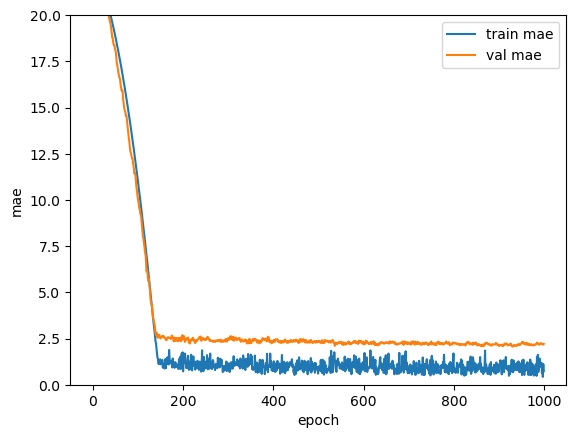

In [41]:
plt.plot(history.history['mae'],label='train mae')
plt.plot(history.history['val_mae'],label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(loc='best')
plt.ylim([0,20])
plt.show()

In [42]:
#Model evaluation
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train loss: {train_loss:.3f}")
print(f"Test loss : {test_loss:.3f}")
print(f"Train mae : {train_mae:.3f}")
print(f"Test mae  : {test_mae:.3f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5674 - mae: 0.3589
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.4091 - mae: 2.0055
Train loss: 2.230
Test loss : 15.956
Train mae : 0.666
Test mae  : 2.174


In [43]:
#Save model
model.save("my_ann_model.h5")

In [44]:
# Then load the model
model = load_model("my_ann_model.h5")


In [45]:
#Save the best model only

In [46]:
#Import ModelCheckpoint
from keras.callbacks import ModelCheckpoint

In [47]:
#Set model checkpoint
model_checkpoint = ModelCheckpoint("my_ann_model_2.h5",
                                   save_best_only=True)

In [49]:
# Recreate and compile model
model = ann()  # recreate a fresh model instance

In [50]:
model.compile(optimizer='adam',
              loss='mse',  # or appropriate loss like 'binary_crossentropy' or 'categorical_crossentropy'
              metrics=['mae'])  # or ['accuracy'] depending on task

In [51]:
#Fit and save model
history=model.fit(X_train,y_train,
                  batch_size=64,
                  epochs=1000,
                  validation_split=0.2,
                  callbacks=[model_checkpoint])

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 606.2715 - mae: 23.0289

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 601.8519 - mae: 22.9748 - val_loss: 560.8596 - val_mae: 21.4735
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 581.6492 - mae: 23.0490

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 577.8068 - mae: 22.9846 - val_loss: 557.8279 - val_mae: 21.4741
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 549.1075 - mae: 22.6317

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 548.9625 - mae: 22.6298 - val_loss: 554.8065 - val_mae: 21.4786
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 561.8769 - mae: 22.9954

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 558.1549 - mae: 22.9255 - val_loss: 551.8721 - val_mae: 21.4841
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 570.3105 - mae: 23.3138

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 564.2006 - mae: 23.1833 - val_loss: 549.1230 - val_mae: 21.4906
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 500.4127 - mae: 21.9676

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 504.9112 - mae: 22.0535 - val_loss: 546.3794 - val_mae: 21.4957
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 522.8908 - mae: 22.3481

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 522.8170 - mae: 22.3625 - val_loss: 543.8526 - val_mae: 21.4946
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 509.5831 - mae: 22.1441

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 511.3695 - mae: 22.1839 - val_loss: 540.7261 - val_mae: 21.4796
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 531.5270 - mae: 22.7204

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 528.6479 - mae: 22.6552 - val_loss: 537.5626 - val_mae: 21.4578
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 501.0500 - mae: 21.9743

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 502.7226 - mae: 22.0241 - val_loss: 535.6213 - val_mae: 21.4548
Epoch 11/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 503.2780 - mae: 22.1462

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 503.7371 - mae: 22.1578 - val_loss: 534.1850 - val_mae: 21.4617
Epoch 12/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 547.6301 - mae: 23.0744

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 540.2532 - mae: 22.9213 - val_loss: 532.9342 - val_mae: 21.4660
Epoch 13/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 525.8057 - mae: 22.5659

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 521.7411 - mae: 22.4872 - val_loss: 531.9478 - val_mae: 21.4845
Epoch 14/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 491.3045 - mae: 21.9295

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 491.8729 - mae: 21.9462 - val_loss: 530.2169 - val_mae: 21.4806
Epoch 15/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 499.0144 - mae: 22.1175

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 498.2816 - mae: 22.0919 - val_loss: 529.1161 - val_mae: 21.4665
Epoch 16/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 507.4180 - mae: 22.2627

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 504.3437 - mae: 22.2015 - val_loss: 527.6808 - val_mae: 21.4677
Epoch 17/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 470.7509 - mae: 21.4949 - val_loss: 528.5308 - val_mae: 21.5325
Epoch 18/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 462.6664 - mae: 21.3040

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 466.0463 - mae: 21.3788 - val_loss: 526.9471 - val_mae: 21.5159
Epoch 19/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 469.9911 - mae: 21.5267

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 471.0954 - mae: 21.5519 - val_loss: 524.1369 - val_mae: 21.4646
Epoch 20/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 467.7178 - mae: 21.4890

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 468.7425 - mae: 21.5076 - val_loss: 522.4704 - val_mae: 21.4530
Epoch 21/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 465.6586 - mae: 21.4083

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 466.3210 - mae: 21.4270 - val_loss: 521.8776 - val_mae: 21.4911
Epoch 22/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 481.0381 - mae: 21.7983

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 478.4070 - mae: 21.7382 - val_loss: 520.9669 - val_mae: 21.4849
Epoch 23/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 457.7794 - mae: 21.2460

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 458.5406 - mae: 21.2639 - val_loss: 518.4040 - val_mae: 21.4001
Epoch 24/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 436.2701 - mae: 20.7738

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 439.9228 - mae: 20.8560 - val_loss: 514.2913 - val_mae: 21.3407
Epoch 25/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 453.2822 - mae: 21.1833

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 453.2335 - mae: 21.1823 - val_loss: 510.0248 - val_mae: 21.3097
Epoch 26/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 438.5103 - mae: 20.8330

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 440.3365 - mae: 20.8749 - val_loss: 505.5378 - val_mae: 21.2385
Epoch 27/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 442.4589 - mae: 20.9238

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 442.8189 - mae: 20.9348 - val_loss: 502.5622 - val_mae: 21.1810
Epoch 28/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 429.3231 - mae: 20.5908

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 431.2691 - mae: 20.6410 - val_loss: 496.1301 - val_mae: 21.0659
Epoch 29/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 438.2544 - mae: 20.8661

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 437.8723 - mae: 20.8537 - val_loss: 488.7452 - val_mae: 20.8899
Epoch 30/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 421.5256 - mae: 20.4146

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 423.3238 - mae: 20.4603 - val_loss: 484.4983 - val_mae: 20.8109
Epoch 31/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 415.1327 - mae: 20.2177

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 417.5712 - mae: 20.2786 - val_loss: 475.6179 - val_mae: 20.6453
Epoch 32/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 424.0241 - mae: 20.5193

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 423.8139 - mae: 20.5117 - val_loss: 470.0209 - val_mae: 20.5504
Epoch 33/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 417.4962 - mae: 20.3522

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 417.7392 - mae: 20.3537 - val_loss: 464.3672 - val_mae: 20.4292
Epoch 34/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 400.2739 - mae: 19.9426

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 402.4481 - mae: 19.9933 - val_loss: 463.9530 - val_mae: 20.4214
Epoch 35/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 425.3259 - mae: 20.5555

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 422.5677 - mae: 20.4845 - val_loss: 457.8559 - val_mae: 20.2888
Epoch 36/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 415.2708 - mae: 20.2686

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 413.6573 - mae: 20.2251 - val_loss: 449.7433 - val_mae: 20.1780
Epoch 37/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 409.7392 - mae: 20.1456 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 408.0556 - mae: 20.1019 - val_loss: 441.6322 - val_mae: 19.9388
Epoch 38/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 379.7018 - mae: 19.3923

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 382.2841 - mae: 19.4529 - val_loss: 432.0474 - val_mae: 19.8237
Epoch 39/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 398.7827 - mae: 19.9003

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 397.2747 - mae: 19.8544 - val_loss: 426.5423 - val_mae: 19.7233
Epoch 40/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 375.3240 - mae: 19.2679

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 376.8004 - mae: 19.3053 - val_loss: 419.8124 - val_mae: 19.5419
Epoch 41/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 367.8970 - mae: 19.0917

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 369.5697 - mae: 19.1358 - val_loss: 408.5629 - val_mae: 19.2890
Epoch 42/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 355.0376 - mae: 18.6955

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 358.1319 - mae: 18.7824 - val_loss: 398.1579 - val_mae: 19.0306
Epoch 43/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 385.3725 - mae: 19.5096

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 382.4855 - mae: 19.4368 - val_loss: 390.2960 - val_mae: 18.8191
Epoch 44/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 381.2165 - mae: 19.4599

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 377.9814 - mae: 19.3711 - val_loss: 389.0892 - val_mae: 18.8626
Epoch 45/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 352.4731 - mae: 18.6659

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 353.4718 - mae: 18.6845 - val_loss: 386.1951 - val_mae: 18.7894
Epoch 46/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 335.3909 - mae: 18.1941

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 338.2414 - mae: 18.2662 - val_loss: 372.4516 - val_mae: 18.3378
Epoch 47/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 354.9622 - mae: 18.7520

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 353.2943 - mae: 18.7054 - val_loss: 363.0588 - val_mae: 18.3004
Epoch 48/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 348.3138 - mae: 18.5826

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 346.6733 - mae: 18.5377 - val_loss: 356.0507 - val_mae: 18.1781
Epoch 49/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 335.2138 - mae: 18.2194

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 334.9050 - mae: 18.2082 - val_loss: 354.5968 - val_mae: 18.0229
Epoch 50/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 337.0564 - mae: 18.1975

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 335.7157 - mae: 18.1626 - val_loss: 346.8630 - val_mae: 17.9382
Epoch 51/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 342.6701 - mae: 18.3280

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 339.4804 - mae: 18.2435 - val_loss: 333.0398 - val_mae: 17.5914
Epoch 52/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 310.2539 - mae: 17.5081

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 311.1245 - mae: 17.5321 - val_loss: 324.1506 - val_mae: 17.3119
Epoch 53/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 302.4878 - mae: 17.2901

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - loss: 303.7587 - mae: 17.3220 - val_loss: 317.2880 - val_mae: 17.1962
Epoch 54/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 296.7322 - mae: 17.1478

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 297.7123 - mae: 17.1742 - val_loss: 310.5311 - val_mae: 17.0572
Epoch 55/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 296.4547 - mae: 17.0787

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 296.7606 - mae: 17.0871 - val_loss: 300.2152 - val_mae: 16.7105
Epoch 56/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 305.3848 - mae: 17.3623

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 303.1284 - mae: 17.2933 - val_loss: 296.5822 - val_mae: 16.6281
Epoch 57/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 275.3602 - mae: 16.5137

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 276.7989 - mae: 16.5558 - val_loss: 287.9012 - val_mae: 16.3473
Epoch 58/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 280.4302 - mae: 16.6741

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 279.9429 - mae: 16.6586 - val_loss: 276.6534 - val_mae: 16.0093
Epoch 59/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 286.8649 - mae: 16.8549

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 284.3062 - mae: 16.7780 - val_loss: 272.8050 - val_mae: 15.9697
Epoch 60/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 249.5791 - mae: 15.6867

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 252.2769 - mae: 15.7731 - val_loss: 265.2615 - val_mae: 15.7410
Epoch 61/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 255.8857 - mae: 15.8572

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 256.7907 - mae: 15.8835 - val_loss: 252.9823 - val_mae: 15.3601
Epoch 62/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 259.2057 - mae: 16.0324

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - loss: 258.1180 - mae: 15.9972 - val_loss: 245.8649 - val_mae: 15.1485
Epoch 63/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 257.5317 - mae: 15.9661

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 255.8865 - mae: 15.9092 - val_loss: 242.9319 - val_mae: 15.1055
Epoch 64/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 235.6581 - mae: 15.2746

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 236.5470 - mae: 15.3000 - val_loss: 235.7322 - val_mae: 14.7734
Epoch 65/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 240.5533 - mae: 15.4500

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 239.5577 - mae: 15.4131 - val_loss: 230.5249 - val_mae: 14.5508
Epoch 66/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 214.6601 - mae: 14.5459

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 216.9708 - mae: 14.6264 - val_loss: 227.3916 - val_mae: 14.5600
Epoch 67/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 206.1358 - mae: 14.2488

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 208.9816 - mae: 14.3452 - val_loss: 218.2183 - val_mae: 14.2116
Epoch 68/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 235.5590 - mae: 15.2250

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 232.4765 - mae: 15.1246 - val_loss: 210.4586 - val_mae: 13.9472
Epoch 69/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 209.2960 - mae: 14.3694

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 209.5528 - mae: 14.3774 - val_loss: 210.2660 - val_mae: 13.9588
Epoch 70/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 211.7567 - mae: 14.4750

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 210.6040 - mae: 14.4309 - val_loss: 206.5662 - val_mae: 13.7812
Epoch 71/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 210.3428 - mae: 14.4283

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 208.3879 - mae: 14.3572 - val_loss: 200.5951 - val_mae: 13.6318
Epoch 72/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 199.6460 - mae: 14.0683

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 198.4767 - mae: 14.0223 - val_loss: 197.0639 - val_mae: 13.5715
Epoch 73/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 181.5545 - mae: 13.3925

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 182.6150 - mae: 13.4242 - val_loss: 185.5207 - val_mae: 13.1323
Epoch 74/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 163.2748 - mae: 12.5727

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 166.5916 - mae: 12.7063 - val_loss: 180.4711 - val_mae: 12.8208
Epoch 75/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 168.4928 - mae: 12.8724

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 169.7793 - mae: 12.9208 - val_loss: 177.4384 - val_mae: 12.8003
Epoch 76/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 172.3640 - mae: 13.0221

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 172.1132 - mae: 13.0099 - val_loss: 164.3560 - val_mae: 12.2758
Epoch 77/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 163.8126 - mae: 12.7037

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 163.9707 - mae: 12.7089 - val_loss: 161.8827 - val_mae: 12.1897
Epoch 78/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 164.6334 - mae: 12.7524 - val_loss: 163.1364 - val_mae: 12.2718
Epoch 79/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 154.2931 - mae: 12.3281

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 154.2467 - mae: 12.3246 - val_loss: 157.8019 - val_mae: 12.0041
Epoch 80/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 148.0596 - mae: 12.0384

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 148.3108 - mae: 12.0475 - val_loss: 153.6583 - val_mae: 11.8793
Epoch 81/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 153.9157 - mae: 12.2931

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 152.2109 - mae: 12.2237 - val_loss: 143.1767 - val_mae: 11.5112
Epoch 82/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 154.3570 - mae: 12.2991

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 151.8104 - mae: 12.1926 - val_loss: 137.6424 - val_mae: 11.1719
Epoch 83/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 139.6869 - mae: 11.6592

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 138.8793 - mae: 11.6237 - val_loss: 131.6586 - val_mae: 10.7853
Epoch 84/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 142.7415 - mae: 11.7607

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 140.6487 - mae: 11.6725 - val_loss: 124.1239 - val_mae: 10.6387
Epoch 85/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 117.2350 - mae: 10.6140

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 118.6049 - mae: 10.6813 - val_loss: 115.9598 - val_mae: 10.3147
Epoch 86/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 129.5189 - mae: 11.1429 - val_loss: 116.3176 - val_mae: 10.1614
Epoch 87/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 117.1401 - mae: 10.5457

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 117.2822 - mae: 10.5532 - val_loss: 114.2263 - val_mae: 10.0976
Epoch 88/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 109.1336 - mae: 10.3594

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 109.2266 - mae: 10.3624 - val_loss: 105.8752 - val_mae: 9.7181
Epoch 89/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 104.4982 - mae: 10.0984

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 104.8967 - mae: 10.1097 - val_loss: 100.7742 - val_mae: 9.4935
Epoch 90/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 109.4101 - mae: 10.3836

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 108.0515 - mae: 10.3120 - val_loss: 98.5993 - val_mae: 9.4021
Epoch 91/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 103.1638 - mae: 10.0445

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 102.1840 - mae: 9.9943 - val_loss: 93.6781 - val_mae: 9.1111
Epoch 92/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 87.0077 - mae: 9.1977

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 88.1664 - mae: 9.2539 - val_loss: 90.1723 - val_mae: 8.9059
Epoch 93/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 88.5072 - mae: 9.2521

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 88.7408 - mae: 9.2647 - val_loss: 86.1889 - val_mae: 8.7739
Epoch 94/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 86.3460 - mae: 9.1812

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 86.2046 - mae: 9.1710 - val_loss: 79.7842 - val_mae: 8.4471
Epoch 95/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 87.8036 - mae: 9.1974

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 87.1003 - mae: 9.1500 - val_loss: 74.3363 - val_mae: 8.1484
Epoch 96/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 70.9764 - mae: 8.2001 - val_loss: 74.5133 - val_mae: 8.0742
Epoch 97/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 71.2284 - mae: 8.3354

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 71.8048 - mae: 8.3639 - val_loss: 68.2224 - val_mae: 7.7164
Epoch 98/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 72.1749 - mae: 8.3345

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 72.1471 - mae: 8.3294 - val_loss: 63.0605 - val_mae: 7.3992
Epoch 99/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 90.8592 - mae: 9.2117

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 87.6559 - mae: 9.0264 - val_loss: 58.7449 - val_mae: 7.1411
Epoch 100/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 63.2519 - mae: 7.7554

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 63.8003 - mae: 7.7810 - val_loss: 57.3046 - val_mae: 6.9962
Epoch 101/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 60.3533 - mae: 7.6015

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - loss: 60.9255 - mae: 7.6205 - val_loss: 56.4439 - val_mae: 6.8963
Epoch 102/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 56.5020 - mae: 7.3614

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 56.9530 - mae: 7.3865 - val_loss: 51.8448 - val_mae: 6.6719
Epoch 103/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 59.6575 - mae: 7.5176

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 59.2497 - mae: 7.4845 - val_loss: 48.2542 - val_mae: 6.4442
Epoch 104/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 54.2198 - mae: 7.2077

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - loss: 53.9909 - mae: 7.1944 - val_loss: 47.9183 - val_mae: 6.4077
Epoch 105/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 50.1756 - mae: 6.8937

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 50.3286 - mae: 6.9013 - val_loss: 45.3959 - val_mae: 6.2095
Epoch 106/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 44.1017 - mae: 6.5198

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 44.6730 - mae: 6.5589 - val_loss: 42.7506 - val_mae: 5.9772
Epoch 107/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 44.8771 - mae: 6.5659

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 45.0956 - mae: 6.5703 - val_loss: 40.2494 - val_mae: 5.8357
Epoch 108/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 40.2735 - mae: 6.0283

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 41.0676 - mae: 6.0901 - val_loss: 39.6224 - val_mae: 5.7485
Epoch 109/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 38.1554 - mae: 5.9963 - val_loss: 40.8265 - val_mae: 5.8911
Epoch 110/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 41.6424 - mae: 6.2373

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 41.2569 - mae: 6.2078 - val_loss: 38.5459 - val_mae: 5.7126
Epoch 111/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 41.9327 - mae: 6.2810

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 41.0879 - mae: 6.2109 - val_loss: 37.2509 - val_mae: 5.5533
Epoch 112/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 35.0493 - mae: 5.7696

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 34.9917 - mae: 5.7559 - val_loss: 35.1037 - val_mae: 5.4013
Epoch 113/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 31.8921 - mae: 5.4954

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 32.0210 - mae: 5.5003 - val_loss: 33.7647 - val_mae: 5.2774
Epoch 114/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 31.8314 - mae: 5.4423

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 31.7251 - mae: 5.4276 - val_loss: 32.5102 - val_mae: 5.1755
Epoch 115/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 33.8794 - mae: 5.6452

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 33.1519 - mae: 5.5695 - val_loss: 29.8341 - val_mae: 4.9775
Epoch 116/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 23.9050 - mae: 4.6636

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 24.6290 - mae: 4.7252 - val_loss: 29.4400 - val_mae: 4.8786
Epoch 117/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 28.3942 - mae: 5.1513

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 27.9539 - mae: 5.1053 - val_loss: 27.1419 - val_mae: 4.6614
Epoch 118/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 20.0706 - mae: 4.3001

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 20.7269 - mae: 4.3704 - val_loss: 24.4487 - val_mae: 4.4116
Epoch 119/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 34.0580 - mae: 5.5173

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 32.4643 - mae: 5.3588 - val_loss: 24.1286 - val_mae: 4.3710
Epoch 120/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 21.3445 - mae: 4.3979

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 21.3899 - mae: 4.4026 - val_loss: 23.4318 - val_mae: 4.2982
Epoch 121/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 21.9052 - mae: 4.4617

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 21.7303 - mae: 4.4326 - val_loss: 21.8274 - val_mae: 4.0882
Epoch 122/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 17.7382 - mae: 3.8732

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 18.1132 - mae: 3.9162 - val_loss: 21.1007 - val_mae: 3.9895
Epoch 123/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 18.0322 - mae: 4.0901

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 17.9355 - mae: 4.0738 - val_loss: 20.6229 - val_mae: 3.9770
Epoch 124/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 17.7260 - mae: 4.0038 - val_loss: 21.1502 - val_mae: 3.9675
Epoch 125/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 16.2975 - mae: 3.8482

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 16.2717 - mae: 3.8309 - val_loss: 20.4639 - val_mae: 3.8583
Epoch 126/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 17.9585 - mae: 4.0041

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 17.4478 - mae: 3.9357 - val_loss: 19.2978 - val_mae: 3.7447
Epoch 127/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 13.7541 - mae: 3.4900

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - loss: 13.7566 - mae: 3.4872 - val_loss: 18.7225 - val_mae: 3.7308
Epoch 128/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 15.7036 - mae: 3.6268

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 15.3975 - mae: 3.5835 - val_loss: 18.0164 - val_mae: 3.7010
Epoch 129/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 11.9045 - mae: 3.2841

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 11.8678 - mae: 3.2757 - val_loss: 17.1999 - val_mae: 3.4767
Epoch 130/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 13.8561 - mae: 3.3766

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 13.7745 - mae: 3.3471 - val_loss: 16.4859 - val_mae: 3.2936
Epoch 131/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 12.0161 - mae: 3.1838

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 11.8195 - mae: 3.1544 - val_loss: 14.9616 - val_mae: 3.1488
Epoch 132/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 9.8626 - mae: 2.8543

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 9.9680 - mae: 2.8671 - val_loss: 14.2170 - val_mae: 3.0910
Epoch 133/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 8.7495 - mae: 2.4836

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 9.0984 - mae: 2.5452 - val_loss: 13.9668 - val_mae: 3.0401
Epoch 134/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 11.1569 - mae: 2.9721

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 10.8241 - mae: 2.9264 - val_loss: 13.2876 - val_mae: 2.9180
Epoch 135/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 7.7613 - mae: 2.3066

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 8.0363 - mae: 2.3649 - val_loss: 13.0150 - val_mae: 2.8932
Epoch 136/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 8.7839 - mae: 2.6590

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 8.7241 - mae: 2.6361 - val_loss: 12.6552 - val_mae: 2.8609
Epoch 137/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 11.9901 - mae: 3.1552 - val_loss: 12.8361 - val_mae: 2.8142
Epoch 138/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 6.2131 - mae: 2.1802 - val_loss: 12.6805 - val_mae: 2.8214
Epoch 139/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 8.5669 - mae: 2.5611

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 8.3162 - mae: 2.5139 - val_loss: 12.0564 - val_mae: 2.7811
Epoch 140/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 6.6835 - mae: 2.3140 - val_loss: 12.1910 - val_mae: 2.7570
Epoch 141/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 5.5275 - mae: 2.1592

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 5.5088 - mae: 2.1484 - val_loss: 12.0069 - val_mae: 2.7210
Epoch 142/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 6.3710 - mae: 2.0273

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 6.4692 - mae: 2.0414 - val_loss: 11.6278 - val_mae: 2.6929
Epoch 143/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 6.2202 - mae: 2.2349

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 6.0240 - mae: 2.1887 - val_loss: 10.9953 - val_mae: 2.6326
Epoch 144/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 6.0607 - mae: 2.1163 - val_loss: 11.1936 - val_mae: 2.5754
Epoch 145/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 6.2061 - mae: 2.0887 - val_loss: 11.0481 - val_mae: 2.4489
Epoch 146/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 5.5713 - mae: 2.0510

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 5.4018 - mae: 2.0117 - val_loss: 10.4565 - val_mae: 2.4328
Epoch 147/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 4.2884 - mae: 1.7667 - val_loss: 11.2761 - val_mae: 2.4908
Epoch 148/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 4.4725 - mae: 1.6176 - val_loss: 11.7640 - val_mae: 2.5641
Epoch 149/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 3.5547 - mae: 1.6142 - val_loss: 11.3329 - val_mae: 2.5240
Epoch 150/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 5.1551 - mae: 1.9931

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 5.0264 - mae: 1.9562 - val_loss: 10.2933 - val_mae: 2.3492
Epoch 151/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 5.6366 - mae: 2.0961 - val_loss: 12.0764 - val_mae: 2.4860
Epoch 152/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 3.5914 - mae: 1.5259

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 3.6155 - mae: 1.5367 - val_loss: 10.2187 - val_mae: 2.3546
Epoch 153/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 5.3210 - mae: 1.9843

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 5.1482 - mae: 1.9423 - val_loss: 9.7704 - val_mae: 2.3286
Epoch 154/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 4.5604 - mae: 1.7005 - val_loss: 11.9783 - val_mae: 2.3921
Epoch 155/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 2.7893 - mae: 1.3995 - val_loss: 10.8565 - val_mae: 2.3366
Epoch 156/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 2.4763 - mae: 1.3022 - val_loss: 10.5412 - val_mae: 2.3508
Epoch 157/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 3.9463 - mae: 1.5745 - val_loss: 11.0137 - val_mae: 2.3546
Epoch 158/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 4.8676 - mae: 1.7741 - val_loss: 11.1776 - val_mae: 2.3959
Epoch 159/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 2.5451 - mae: 1.2921 - val_loss: 10.8441 - val_mae: 2.3648
Epoch 160/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 2.5247 - mae: 1.2281 - val_loss: 11.3949 - val_mae: 2.3430
Epoch 161/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 1.9505 - mae: 1.1234 - val_loss: 9.4843 - val_mae: 2.2599
Epoch 162/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 2.7087 - mae: 1.2789 - val_loss: 9.6509 - val_mae: 2.1623
Epoch 163/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 1.8706 - mae: 1.0617 - val_loss: 10.7000 - val_mae: 2.2182
Epoch 164/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 4.3156 - mae: 1.6469 - val_loss: 9.7271 - val_mae: 2.2921
Epoch 165/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 2.8386 - mae: 1.3325 - val_loss: 10.3079 - val_mae: 2.2595
Epoch 166/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 7.2514 - mae: 2.1261 - val_loss: 10.4751 - val_mae: 2.2372
Epoch 167/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 1.7425 - mae: 1.0610 - val_loss: 9.7617 - val_mae: 2.2539
Epoch 168/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 2.6294 - mae: 1.3084

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 2.6364 - mae: 1.3098 - val_loss: 9.4709 - val_mae: 2.1817
Epoch 169/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 2.7137 - mae: 1.2353

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 2.8453 - mae: 1.2721 - val_loss: 9.2632 - val_mae: 2.1558
Epoch 170/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 3.0596 - mae: 1.3393 - val_loss: 9.4390 - val_mae: 2.1880
Epoch 171/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 4.1874 - mae: 1.6595 - val_loss: 10.9959 - val_mae: 2.2460
Epoch 172/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 1.5270 - mae: 0.9416 - val_loss: 9.5474 - val_mae: 2.2447
Epoch 173/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 3.1121 - mae: 1.4965 - val_loss: 9.7293 - val_mae: 2.2724
Epoch 174/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.5957 - mae: 0.9898 - val_loss: 11.2198 - val_mae: 2.3641
Epoch 175/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 3.3601 - mae: 1.4873 - val_loss: 10.6211 - val_mae: 2.2615
Epoch 176/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 2.0239 - mae: 1.1414 - val_loss: 10.3192 - val_mae: 2.3065
Epoch 177/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/st

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 1.8645 - mae: 1.0999 - val_loss: 8.9488 - val_mae: 2.1809
Epoch 224/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 2.3038 - mae: 1.1839

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 2.3290 - mae: 1.1908 - val_loss: 8.4513 - val_mae: 2.1401
Epoch 225/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 1.6151 - mae: 1.0028 - val_loss: 9.9622 - val_mae: 2.1096
Epoch 226/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 3.1477 - mae: 1.4502 - val_loss: 9.7475 - val_mae: 2.1479
Epoch 227/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 1.7862 - mae: 1.0111 - val_loss: 9.2901 - val_mae: 2.2023
Epoch 228/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 1.7085 - mae: 1.0355 - val_loss: 10.2264 - val_mae: 2.2328
Epoch 229/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 1.4709 - mae: 1.0186 - val_loss: 10.9424 - val_mae: 2.3649
Epoch 230/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 2.3600 - mae: 1.2157 - val_loss: 9.2052 - val_mae: 2.1519
Epoch 231/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 2.2405 - mae: 1.2718 - val_loss: 10.5626 - val_mae: 2.2828
Epoch 232/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/ste

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - loss: 0.6860 - mae: 0.6410 - val_loss: 8.4268 - val_mae: 2.0203
Epoch 953/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.7815 - mae: 0.7179 - val_loss: 9.5330 - val_mae: 2.0873
Epoch 954/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.6738 - mae: 0.6086 - val_loss: 10.0267 - val_mae: 2.1536
Epoch 955/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 2.2317 - mae: 1.2748 - val_loss: 9.2486 - val_mae: 2.0794
Epoch 956/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 2.3018 - mae: 1.3460 - val_loss: 9.1365 - val_mae: 2.0624
Epoch 957/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.7562 - mae: 0.6961 - val_loss: 9.3289 - val_mae: 2.0917
Epoch 958/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 2.5675 - mae: 1.3147 - val_loss: 9.5539 - val_mae: 2.1468
Epoch 959/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.7161 - mae: 0.6339 - val_loss: 10.7927 - val_mae: 2.2096
Epoch 960/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 0.7312 - mae: 0.6590 - val_loss: 8.3265 - val_mae: 1.9968
Epoch 967/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 1.3435 - mae: 0.9998 - val_loss: 9.0176 - val_mae: 2.0774
Epoch 968/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 1.6288 - mae: 0.9876 - val_loss: 8.7603 - val_mae: 2.0510
Epoch 969/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.4720 - mae: 0.5367 - val_loss: 8.8639 - val_mae: 2.0761
Epoch 970/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.6541 - mae: 0.6676 - val_loss: 9.5035 - val_mae: 2.1544
Epoch 971/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 1.4485 - mae: 0.9763 - val_loss: 9.0839 - val_mae: 2.0826
Epoch 972/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.4582 - mae: 0.5310 - val_loss: 10.1339 - val_mae: 2.1576
Epoch 973/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 3.5353 - mae: 1.6936 - val_loss: 9.8312 - val_mae: 2.1474
Epoch 974/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step 